<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/minst_classification_by_hand_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공지능 모델을 배우기에 앞서 이번에는 문제정의와 푸는 방법에 대해서 살펴보겠습니다. 문제정의는 0에서 9까지 숫자 손글씨 이미지를 보고, 해당하는 숫자를 맞추는 것입니다. 맞춘다는 표현은 0에서 9까지 숫자 중 하나를 고른다, 즉 분류한다는 의미로도 볼 수 있습니다. 이러한 분류 문제를 코드로 어떻게 푸는 지 살펴보겠습니다.

먼저 숫자 손글씨 이미지 데이터셋인 MNIST를 불러옵니다.

In [77]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

데이터셋 형태 살펴봅니다. 크게 훈련셋과 시험셋으로 구분됩니다.

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


샘플 하나를 살펴보겠습니다.

In [79]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [80]:
print(y_train[0])

5


In [81]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [82]:
print(y_test[0])

7


시험셋의 샘플 데이터 10개를 가시화 시켜봅니다.

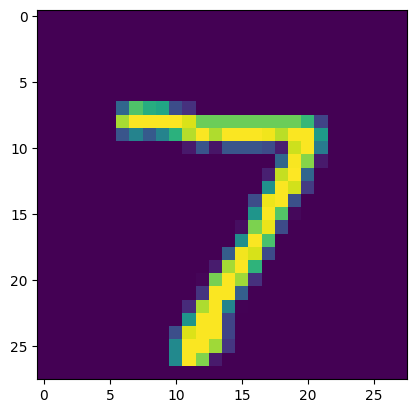

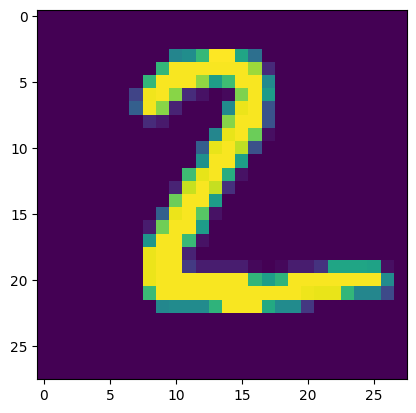

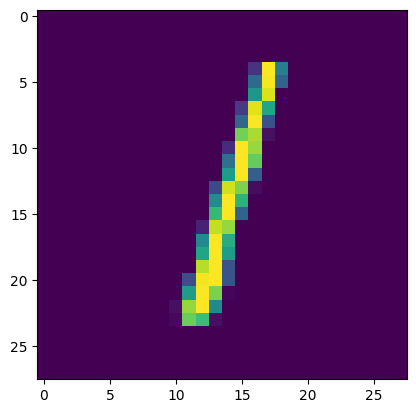

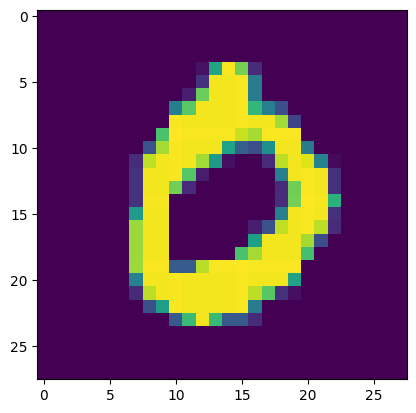

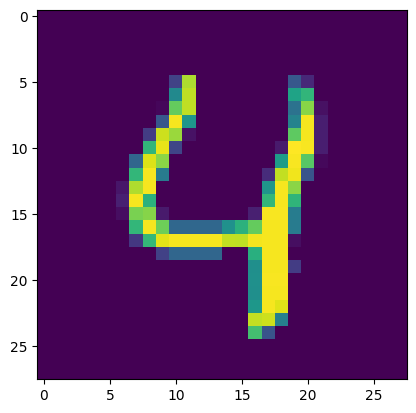

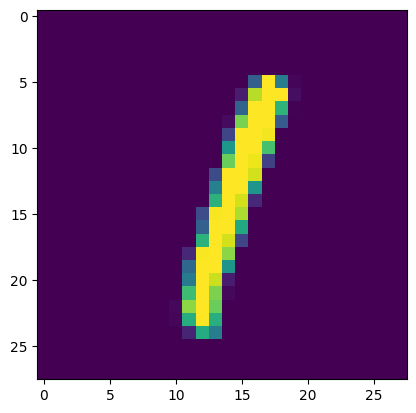

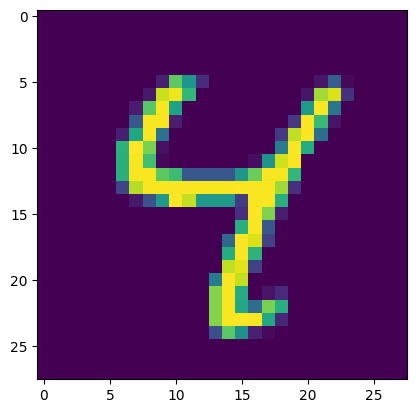

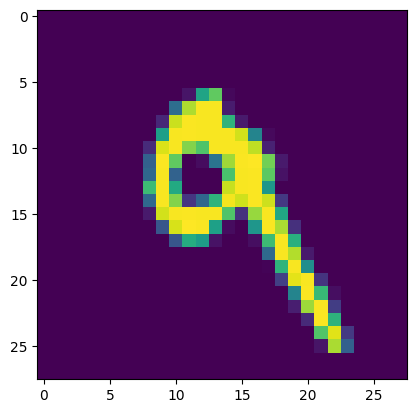

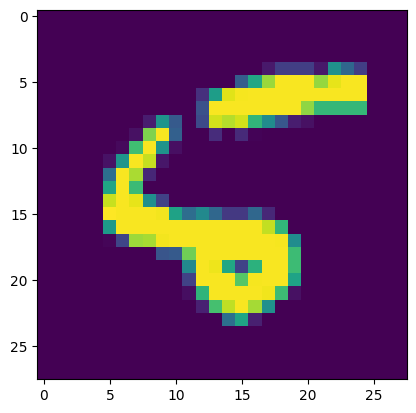

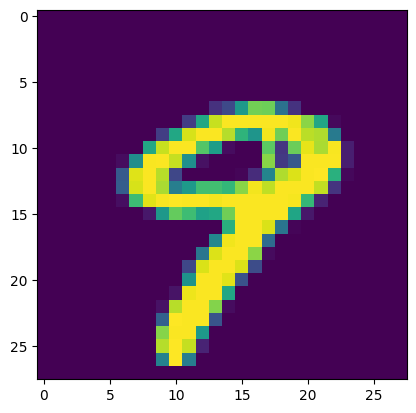

In [83]:
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.imshow(x_test[i])
    plt.show()

컬러 테이블을 흑백으로 바꿔서 다시 표출해보겠습니다.

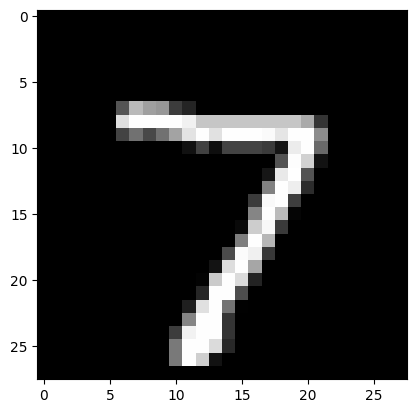

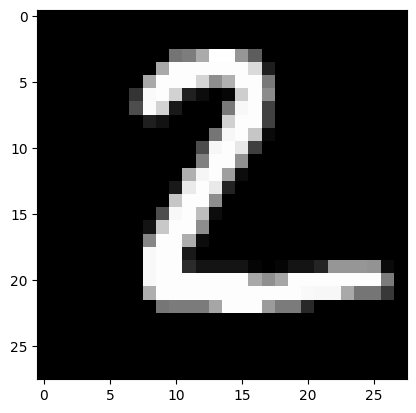

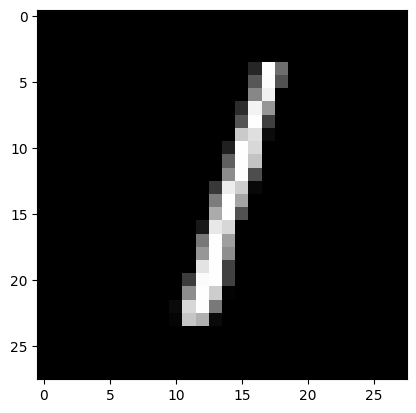

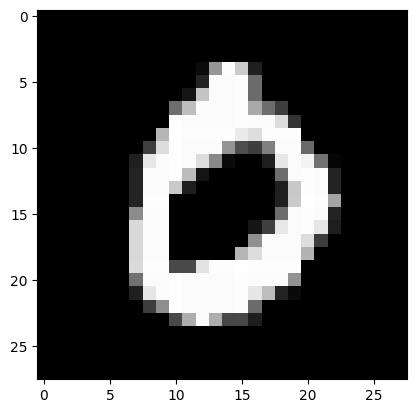

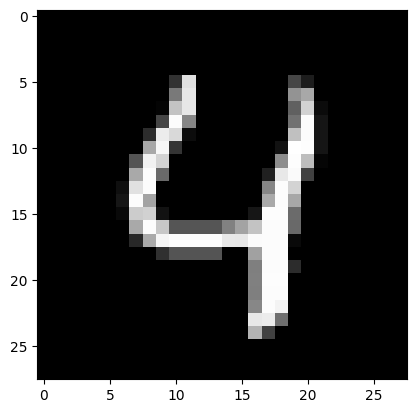

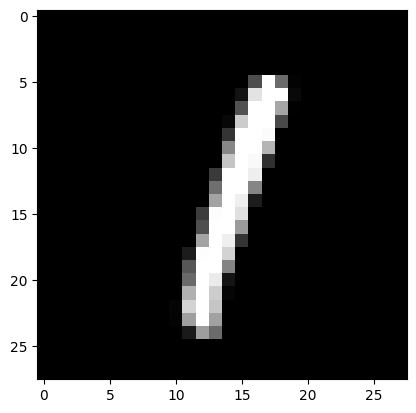

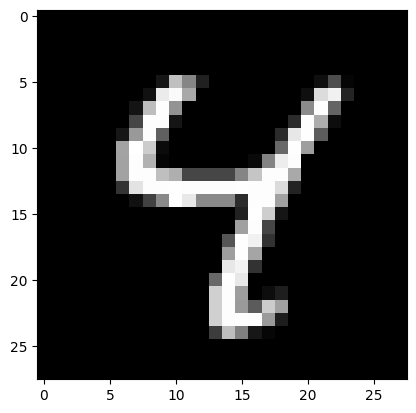

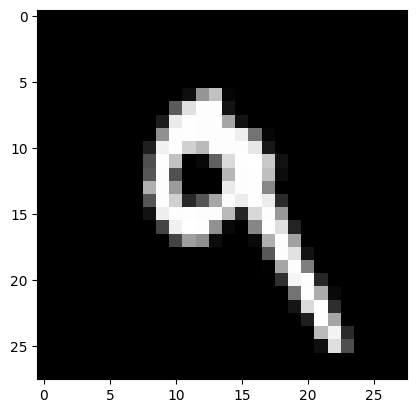

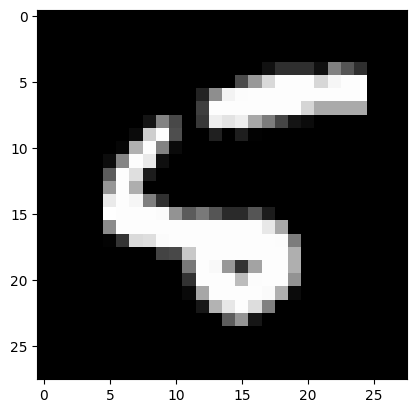

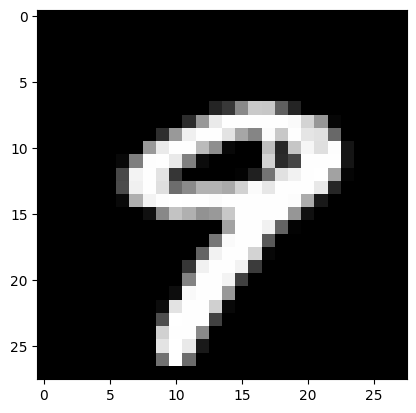

In [84]:
for i in range(0,10):
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

샘플 데이터 이미지 10개를 보고 각 샘플에 대한 라벨을 기록합니다. 기록한 배열을 파일로 저장합니다.

In [85]:
import numpy as np
import tensorflow as tf
y_pred = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

np.savetxt('y_pred.csv', y_pred, fmt='%d')

In [86]:
import matplotlib.pyplot as plt

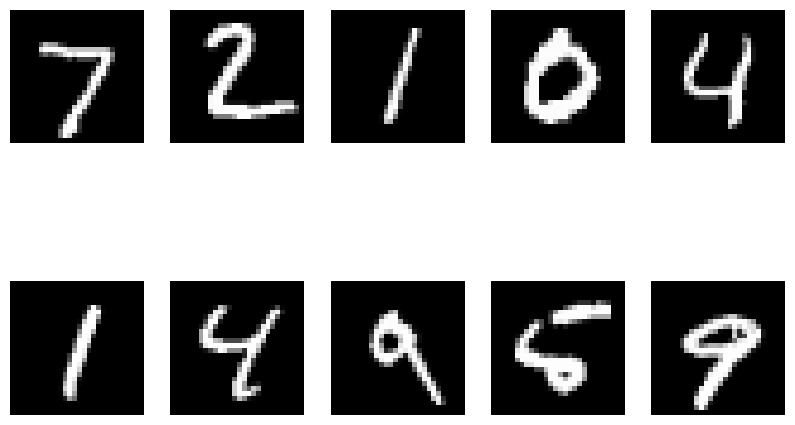

In [87]:
plt.figure(figsize=(10,10))
for index in range(10):
    plt.subplot(3,5,index+1)
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')

plt.show()

# 데이터 전처리 (정규화, 원핫 인코딩)
## 학습 데이터 / 테스트 데이터 정규화 (Normalization)



In [88]:
x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)

## 정답 데이터 원핫 인코딩 (One-Hot Encoding)

In [89]:
t_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 모델 구축 및 컴파일

In [90]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
hist = model.fit(x_train, t_train, epochs=10, batch_size=32, validation_data=(x_test, t_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2767 - accuracy: 0.9210 - val_loss: 0.1555 - val_accuracy: 0.9537
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1289 - accuracy: 0.9618 - val_loss: 0.1239 - val_accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9729 - val_loss: 0.0890 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0680 - accuracy: 0.9795 - val_loss: 0.0942 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0833 - val_accuracy:

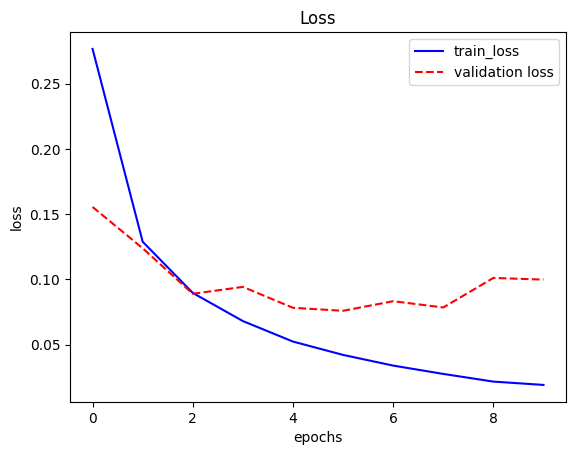

In [96]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], 'b-', label='train_loss')
plt.plot(hist.history['val_loss'], 'r--', label='validation loss')
plt.legend(loc='best')
plt.show()

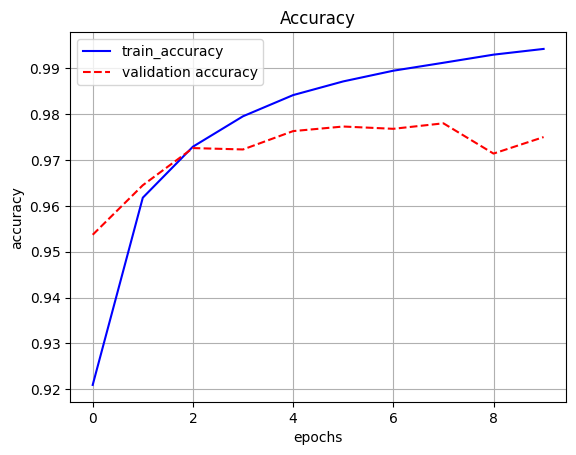

In [97]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(hist.history['val_accuracy'], 'r--', label='validation accuracy')
plt.legend(loc='best')
plt.show()

313/313 [==============================] - 1s 4ms/step


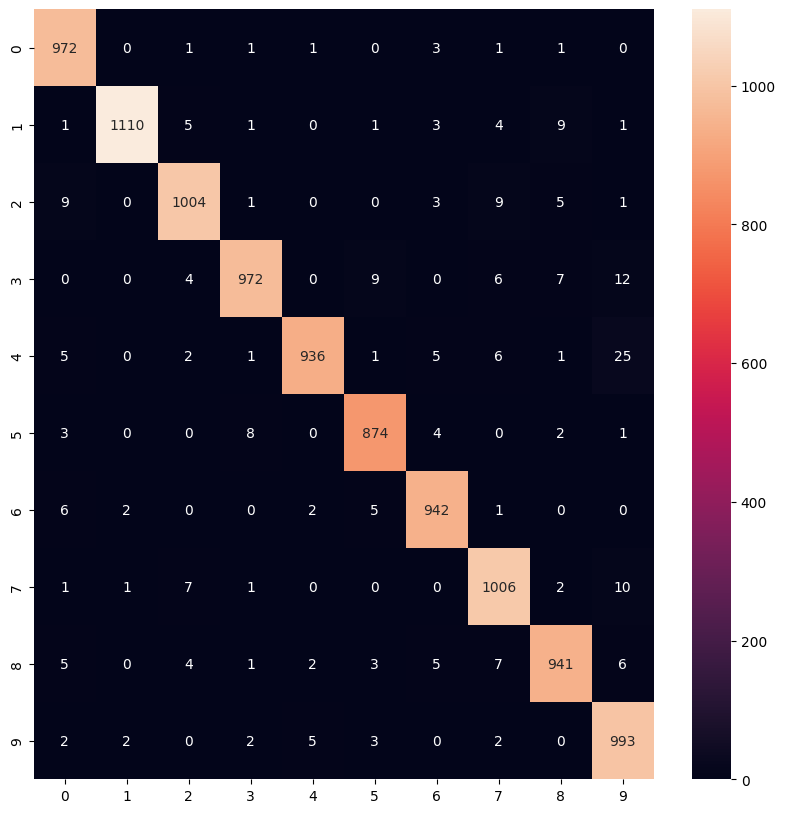

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,10))
predicated_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicated_value, axis=-1))


sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [106]:
print(cm)
print('\n')

for i in range(10):
  print(('label = %d\t(%d/%d)\taccuracy = %.3f')%
        (i, np.max(cm[i]), np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[ 972    0    1    1    1    0    3    1    1    0]
 [   1 1110    5    1    0    1    3    4    9    1]
 [   9    0 1004    1    0    0    3    9    5    1]
 [   0    0    4  972    0    9    0    6    7   12]
 [   5    0    2    1  936    1    5    6    1   25]
 [   3    0    0    8    0  874    4    0    2    1]
 [   6    2    0    0    2    5  942    1    0    0]
 [   1    1    7    1    0    0    0 1006    2   10]
 [   5    0    4    1    2    3    5    7  941    6]
 [   2    2    0    2    5    3    0    2    0  993]]


label = 0	(972/980)	accuracy = 0.992
label = 1	(1110/1135)	accuracy = 0.978
label = 2	(1004/1032)	accuracy = 0.973
label = 3	(972/1010)	accuracy = 0.962
label = 4	(936/982)	accuracy = 0.953
label = 5	(874/892)	accuracy = 0.980
label = 6	(942/958)	accuracy = 0.983
label = 7	(1006/1028)	accuracy = 0.979
label = 8	(941/974)	accuracy = 0.966
label = 9	(993/1009)	accuracy = 0.984
